<div style="color:#D81F26;
           display:fill;
           border-radius:200px;
           border-style: solid;
           border-width: 6px;
           border-color:#000000;
           background-color:#f5f5f5;
           font-size:30px;
           font-family:Verdana;
           letter-spacing:0.5px">
<h1 style="text-align: center;
           padding: 15px;
           color:#D81F26;">
Design Neural Network model in Keras
</h1>
</div>

<br>
<br>
<br>
<a href="https://imgbb.com/" class="center"><img src="https://i.ibb.co/TT8Wrm7/Keras.png" alt="Keras" border="0"></a>
<br>
<br>
<br>

**Note: It is an educational notebook just to do my homework for the Filoger Neural Network course that teaching by Amin Alipour.**

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Import Libraries</p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

In [3]:
import cv2 as cv
from keras.utils.vis_utils import plot_model

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Load Data</p>

In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [5]:
#Flatten
print("Shape of train: ", X_train.shape)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

Shape of train:  (60000, 28, 28)


In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# <p style="border-radius:15px;border-style:solid;border-color:#838996;border-width:3px;background-color:#f2f3f4;padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Build a Neural Network</p>

<p style = "font-size : 15px; color : #D81F26 ; font-family : 'fantasy'; "><b>
<br>Design a convolutional neural network by following layers on the MNIST dataset:
<br>--
<br>1. Conv2d: number of kernels: 8, size of kernel and strides: desired
<br>2. MaxPooling2d: the size of the kernel: 2x2, strides: desired
<br>3. Conv2d: number of kernels: 16, size of kernel and strides: desired
<br>4. MaxPooling2d: the size of the kernel: 2x2, strides: desired
<br>5. Conv2d: number of kernels: 32, size of kernel and strides: desired
<br>6. MaxPooling2d: the size of the kernel: 2x2, strides: desired
<br>7. Flatten
<br>8. Dense: number of units: 100
<br>9. Dense: number of units = number of classes, activation: Softmax
<br>--
<br>** Other Hyperparameters: Desired
<br>** Not mentioned activations: Relu</b></p>


In [8]:
def conv_model():
    model = Sequential()
    model.add(Conv2D(8, (5, 5), strides=(1, 1), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

    model.add(Conv2D(16, (3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(32, (7, 7), strides=(2, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 1)))

    model.add(Flatten())
    
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [9]:
model = conv_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=200, verbose=2)

2022-06-06 14:12:13.883640: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-06 14:12:14.378999: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
270/270 - 7s - loss: 0.4378 - accuracy: 0.8702 - val_loss: 0.1296 - val_accuracy: 0.9632
Epoch 2/10
270/270 - 5s - loss: 0.1219 - accuracy: 0.9626 - val_loss: 0.0884 - val_accuracy: 0.9753
Epoch 3/10
270/270 - 5s - loss: 0.0842 - accuracy: 0.9738 - val_loss: 0.0742 - val_accuracy: 0.9782
Epoch 4/10
270/270 - 5s - loss: 0.0674 - accuracy: 0.9794 - val_loss: 0.0803 - val_accuracy: 0.9765
Epoch 5/10
270/270 - 5s - loss: 0.0580 - accuracy: 0.9813 - val_loss: 0.0622 - val_accuracy: 0.9812
Epoch 6/10
270/270 - 5s - loss: 0.0521 - accuracy: 0.9836 - val_loss: 0.0526 - val_accuracy: 0.9852
Epoch 7/10
270/270 - 5s - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.0460 - val_accuracy: 0.9853
Epoch 8/10
270/270 - 6s - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0473 - val_accuracy: 0.9867
Epoch 9/10
270/270 - 5s - loss: 0.0351 - accuracy: 0.9890 - val_loss: 0.0484 - val_accuracy: 0.9865
Epoch 10/10
270/270 - 5s - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0438 - val_accuracy: 0.9898

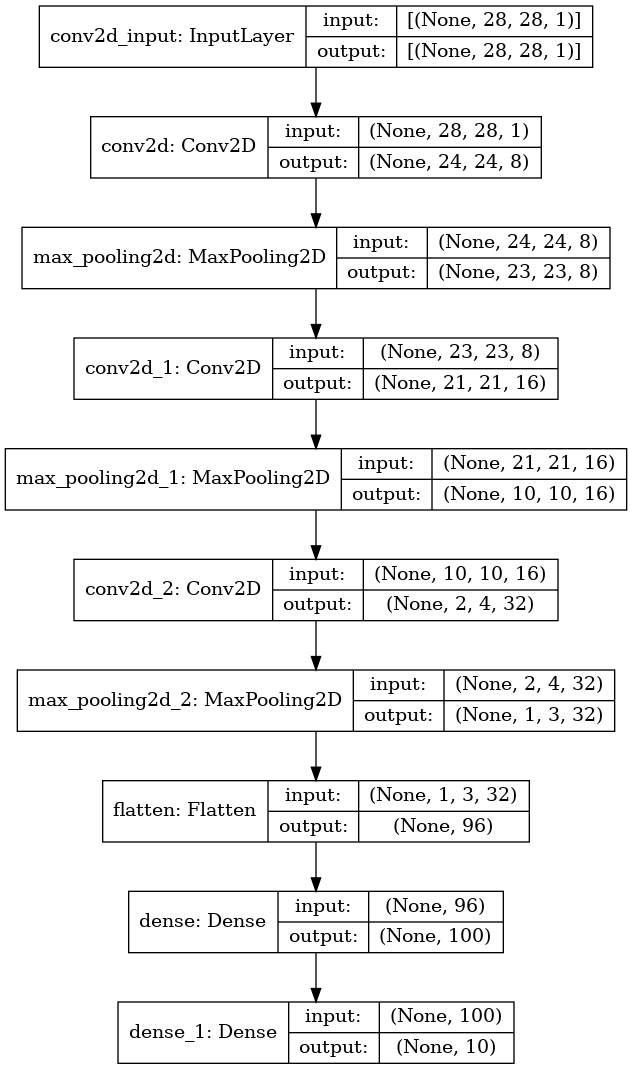

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [12]:
scores[1]

0.9871000051498413

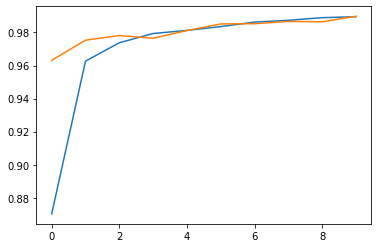

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# <p style="padding: 20px;font-family:Verdana;color:#D81F26;font-size:30px;text-align: center;">Finished!</p>